### Analysing live data using CURE
Below applies CURE clustering to static data, producing a table with the desired number of clusters and representative points. These representative points are used to classify new live data, which is fed in from a separate q process running the script `load.q`.

### Dependencies
To run the below notebook, the following dependencies are required.
```
- embedPy
- matplotlib
```

In [1]:
\l clust.q
plt:.p.import`matplotlib.pyplot

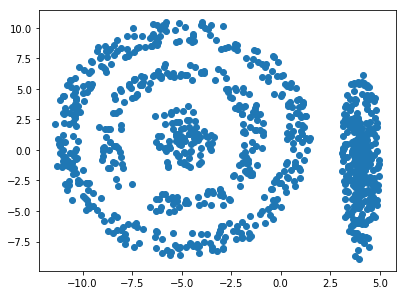

In [2]:
\S 42
dp:1000
dsc:{(y+x?z-y)*/:(cos;sin)@\:4*x?acos 0}
d :flip(-5 1)+(1 1.5)*dsc[1000;0;1.8],'dsc[2000;3.1;4.2],'dsc[4000;5.2;6.5]
d,:flip(4 -1)+(1 8)*dsc[4000;0;1.]
d@:neg[dp&count d]?count d
plt[`:scatter][;]. flip d;
plt[`:show][];

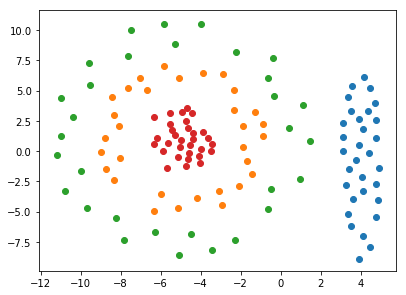

In [3]:
/.clust.cure[data;n clust;dist;n reps;comp;C code?;streaming?]
r:.clust.cure[d;4;`e2dist;30;0;0b;1b]
{plt[`:scatter][;]. flip x}each exec pts by clt from r;
plt[`:show][];

In [4]:
/run `q load.q` as new process
\p 5001
show newpts:([]pts:();clt:`long$())
classify:{`newpts upsert .clust.clustnew[r;x;y]}

pts clt
-------


In [6]:
/new data fed in and classified every 5s
newpts

pts                  clt
------------------------
-2.144952  0.3418224 342
0.319593   -1.866716 795
-6.438323  -3.964555 342
5.70066    0.6941923 207
4.223433   -1.76806  207
-0.1363303 1.570406  795
-8.322228  -6.080186 795
-2.48724   2.274904  342
0.5896155  3.832197  795
-5.406769  3.839062  876
-0.584235  2.693432  342
9.344797   -5.38723  207
8.999501   -1.21838  207
1.518103   1.838009  795
6.963133   -2.21888  207
-2.16914   -8.375291 795
8.735007   -4.435757 207
-5.215318  -6.983734 795
-6.865366  9.570001  795
4.086628   8.883341  207


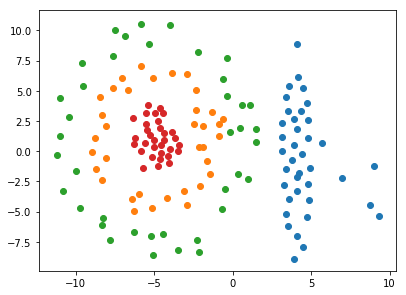

In [7]:
/plot old reps and new pts in clusters
{plt[`:scatter][;]. flip x}each {@[x;key y;,;value y]}.{exec pts by clt from x}each(r;newpts);
plt[`:show][];

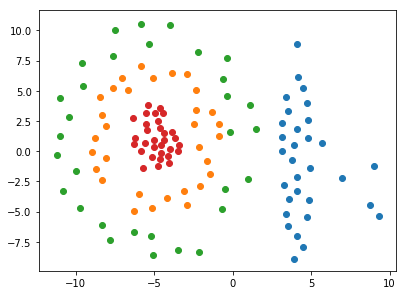

In [11]:
/recalculate rep pts
.z.ts:{r::.clust.i.repupd[r;newpts;`e2dist;30;0]}
.z.ts[]
{plt[`:scatter][;]. flip x}each exec pts by clt from r;
plt[`:show][];

----